In [1]:
import rebound
%matplotlib inline
import matplotlib.pyplot as plt
import observations
import state
import mcmc
import driver
import numpy as np
import hashlib
import corner
from datetime import datetime

In [2]:
label, Niter, Nwalkers, Scale = "simple_emcee_1", 200000, 4, {'a':0.000001, 'm':0.00000001}

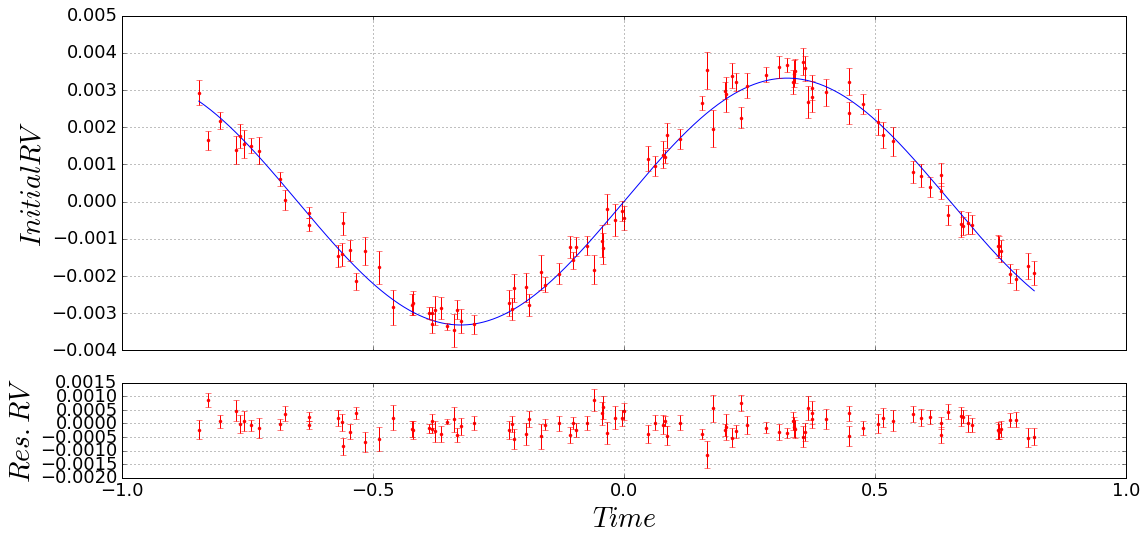

In [3]:
initial_state = state.State(planets= [{'a':0.3500, 'm':0.001965}], ignore_vars='m')
start_state = state.State(planets= [{'a':0.3800, 'm':0.001965}], ignore_vars='m')
obs = driver.createObs(initial_state, 100, 3.0e-4, 9e-5, 1.7)
driver.inLinePlotObs(initial_state, obs, [18,6])

In [4]:
em_bundle, em_h = driver.createEns(label, Niter, start_state, obs, Nwalkers, Scale, printing_every=2000)

Progress: 0.002%, time: 2017-02-28 05:47:18.717331
Progress: 4.002%, time: 2017-02-28 05:47:43.327234
Progress: 8.002%, time: 2017-02-28 05:48:07.069832
Progress: 12.002%, time: 2017-02-28 05:48:31.093851
Progress: 16.002%, time: 2017-02-28 05:48:54.935575
Progress: 20.002%, time: 2017-02-28 05:49:19.067900
Progress: 24.002%, time: 2017-02-28 05:49:44.101926
Progress: 28.002%, time: 2017-02-28 05:50:08.708970
Progress: 32.002%, time: 2017-02-28 05:50:33.823414
Progress: 36.002%, time: 2017-02-28 05:50:58.417111
Progress: 40.002%, time: 2017-02-28 05:51:23.438003
Progress: 44.002%, time: 2017-02-28 05:51:47.854948
Progress: 48.002%, time: 2017-02-28 05:52:12.737276
Progress: 52.002%, time: 2017-02-28 05:52:37.618721
Progress: 56.002%, time: 2017-02-28 05:53:03.123153
Progress: 60.002%, time: 2017-02-28 05:53:28.467062
Progress: 64.002%, time: 2017-02-28 05:53:54.527965
Progress: 68.002%, time: 2017-02-28 05:54:20.750504
Progress: 72.002%, time: 2017-02-28 05:54:46.179799
Progress: 76.00

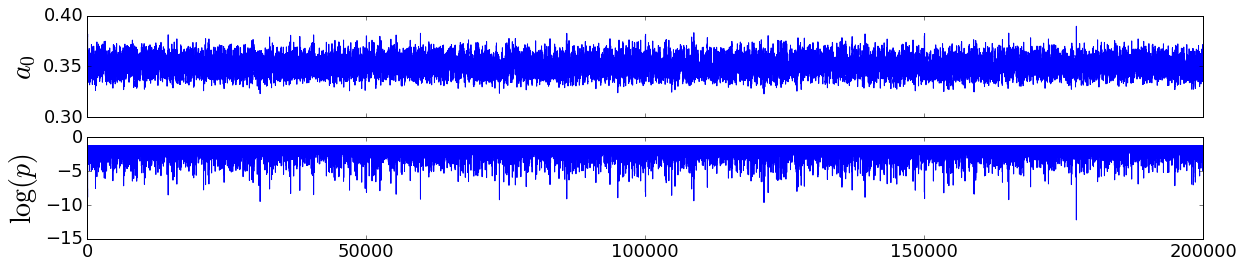

In [5]:
driver.inLinePlotChains(em_bundle, [20,4])

Eliminated burn in, sampled every 2, for every walker.
Selected some 50 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$']
[ 0.35078985]


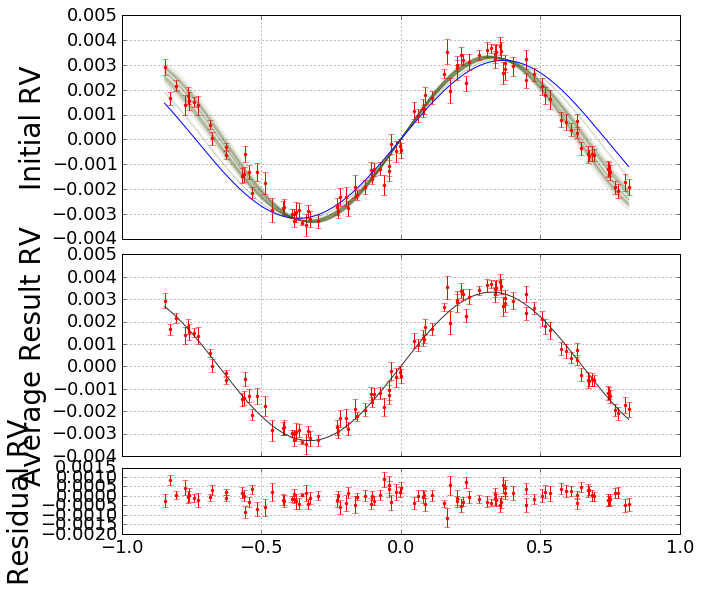

In [6]:
trimmedResEM, trimmedlogpEM = driver.inLinePlotResults(em_bundle, 50, [10,4], 0.5, 2)

AC time 12.0


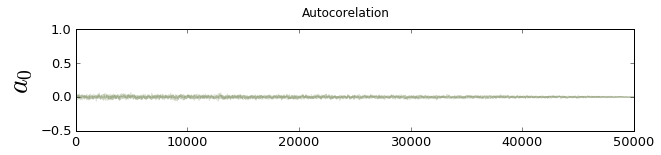

In [7]:
actimesEM = driver.inLinePlotAcTimes(em_bundle, [10, 4])

# Smala

In [8]:
sm_bundle, sm_h = driver.createSMALA(label, Niter/4, start_state, obs, 1.25, 0.14, printing_every=300)

Progress: 0.002%, 9 tries have been made, time: 2017-02-28 05:57:57.485625
Progress: 0.602%, 375 tries have been made, time: 2017-02-28 05:58:00.895463
Progress: 1.202%, 726 tries have been made, time: 2017-02-28 05:58:04.414388
Progress: 1.802%, 1079 tries have been made, time: 2017-02-28 05:58:07.851459
Progress: 2.402%, 1438 tries have been made, time: 2017-02-28 05:58:11.149481
Progress: 3.002%, 1789 tries have been made, time: 2017-02-28 05:58:15.062735
Progress: 3.602%, 2150 tries have been made, time: 2017-02-28 05:58:18.316183
Progress: 4.202%, 2511 tries have been made, time: 2017-02-28 05:58:21.558798
Progress: 4.802%, 2868 tries have been made, time: 2017-02-28 05:58:25.117038
Progress: 5.402%, 3243 tries have been made, time: 2017-02-28 05:58:28.569853
Progress: 6.002%, 3598 tries have been made, time: 2017-02-28 05:58:31.998965
Progress: 6.602%, 3967 tries have been made, time: 2017-02-28 05:58:35.320807
Progress: 7.202%, 4328 tries have been made, time: 2017-02-28 05:58:3

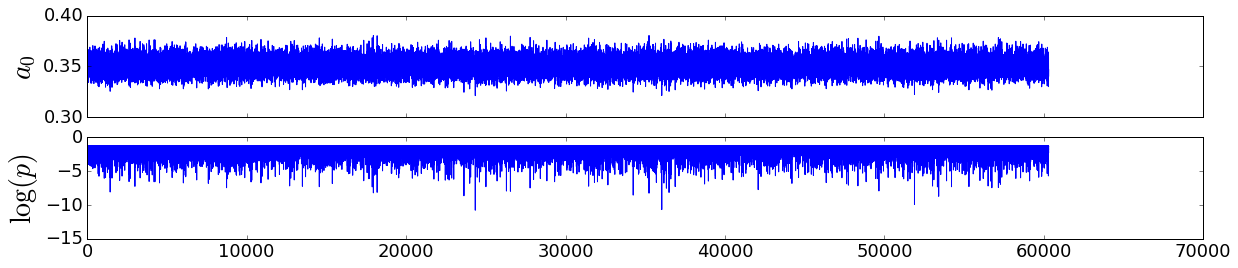

In [9]:
driver.inLinePlotChains(sm_bundle, [20,4])

Eliminated burn in, sampled every 1, for every walker.
Selected some 50 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$']
[ 0.35085155]


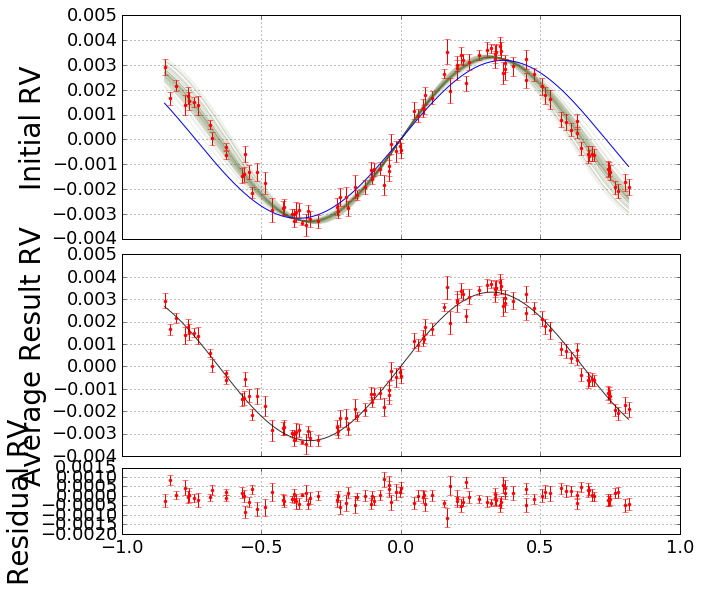

In [10]:
trimmedResSM, trimmedlogpSM = driver.inLinePlotResults(sm_bundle, 50, [10,4], 0.3, 1)

AC time 1.0


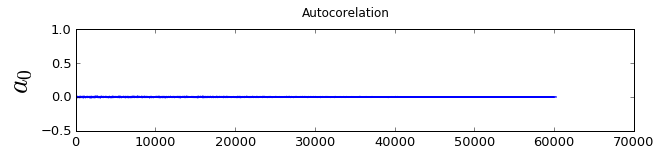

In [11]:
actimesSM = driver.inLinePlotAcTimes(sm_bundle, [10,4])

# Comparison

In [12]:
from scipy import stats

def showCDF(chain1, chain2, size):
    for i in range(len(np.transpose(chain1))):
        fig = plt.figure(figsize=(size[0],size[1]))
        plt.plot(sorted(np.transpose(chain1)[i]), np.linspace(0,1, len(np.transpose(chain1)[i])))
        plt.plot(sorted(np.transpose(chain2)[i]), np.linspace(0,1, len(np.transpose(chain2)[i])))
        plt.ylabel('Fractionsl CDF')
        
def calcKStatistic(chain1, chain2):
    for i in range(len(np.transpose(chain1))):
        print stats.ks_2samp(np.transpose(chain1)[i], np.transpose(chain2)[i])

In [13]:
calcKStatistic(sm_bundle.mcmc_chain, em_bundle.mcmc_chain)

Ks_2sampResult(statistic=0.0053190364142871593, pvalue=0.14486020452583992)


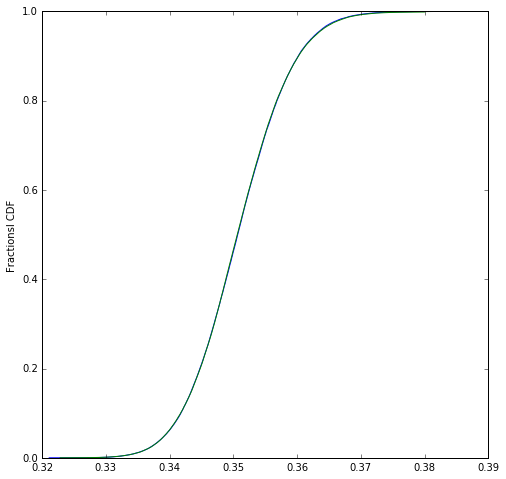

In [14]:
showCDF(sm_bundle.mcmc_chain, em_bundle.mcmc_chain, [8,8])

In [15]:
calcKStatistic(trimmedResSM, trimmedResEM)

Ks_2sampResult(statistic=0.0096942857142857664, pvalue=0.041456556604930049)


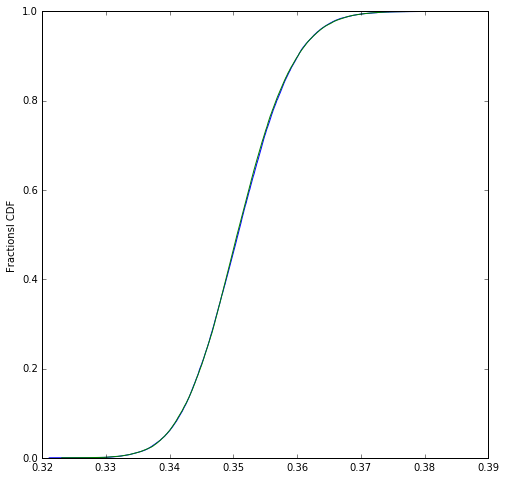

In [16]:
showCDF(trimmedResSM, trimmedResEM, [8,8])